## Introduction

Explain your chosen topic and why it is important for your field.

在这个项目里，我选择了图数据结构，并且阐述在传统金融行业面临的困境。

通过图结构在金融行业的垂直领域进行深耕，能够挖掘出很多我们无法在普通关系性数据库发现的细节。编织出一张知识图谱，辅助金融行业的高风险管理。

## Literature Review

### 讨论知识图谱的进化发展历程（简短）

### 讨论金融系统（传统银行）里进行数据分析的复杂性和重要性（简短）

### 讨论知识图谱在金融行业的应用（重点）


## Example : Simple Shareholding Graph System

### Description



### Data source 


`person` can hold a `corp` in {share} %

`person` can be relative with another `person`

`corp` can hold another `corp` in {share} %

`corp` can be a branch of another `corp`

`person` can be as a role of a `corp`



### Code

#### Data preparation

因为原始数据集是放进图数据库直接存储，可以在图数据库中直接设置tag和edge。而我在example中需要自己实现graph类，所以需要对原始数据集进行预处理。

In [29]:
! pip install faker
! pip install pydbgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [109]:
import pandas as pd

# [1] corp.csv
# define the corporation id and name from the csv file
path1 = './data/corp.csv'
# load the csv into a DataFrame, and specify the column names
corp_df = pd.read_csv(path1)
print(corp_df.head(6))

# [2] person.csv
# define the person id and name from the csv file
path2 = './data/person.csv'
person_df = pd.read_csv(path2)
#print(person_df.head(6))

# [3] person_rel.csv
# define the relationship degree of person id1 and id2 from the csv file
path3 = './data/person_rel.csv'
column_names = ['person_id1', 'person_id2','rel_degree']
person_rel_df = pd.read_csv(path3, header=None, names=column_names)
#print(person_rel_df.head(6))

# [4] corp_rel.csv
# define the relationship of corporation id1 and id2 from the csv file
path4 = './data/corp_rel.csv'
column_names = ['corp_id1', 'corp_id2']
corp_rel_df = pd.read_csv(path4, header=None, names=column_names)
#print(corp_rel_df.head(6))

# [5] corp_share.csv
# define the holdsharing of corporation id1 to id2 from the csv file
path5 = './data/corp_share.csv'
column_names = ['corp_id1', 'corp_id2','share_per']
corp_share_df = pd.read_csv(path5, header=None, names=column_names)
#print(corp_share_df.head(6))

# [6] person_corp_share.csv
# define the holdsharing of person id to the corporation id from the csv file
path6 = './data/person_corp_share.csv'
column_names = ['person_id', 'corp_id','share_per']
person_corp_share_df = pd.read_csv(path6, header=None, names=column_names)
print(person_corp_share_df.head(6))

'''
# [7] person_corp_role.csv
# define the role of person id in the corporation id from the csv file
path7 = './data/person_corp_role.csv'
column_names = ['person_id', 'corp_id','role']
person_corp_role_df = pd.read_csv(path7, header=None, names=column_names)
print(person_corp_role_df.head(6))
'''


  corp_id                        corp_name
0     c_0  Leonard, Robertson and Williams
1     c_1           Brown, Turner and Horn
2     c_2                   Wright-Mahoney
3     c_3                  Mcdowell-Ortega
4     c_4         Jones, Cook and Mckinney
5     c_5      Bennett, Brown and Matthews
  person_id corp_id  share_per
0       p_4     c_1         16
1       p_6     c_1         87
2       p_4     c_2          1
3       p_7     c_4         65
4       p_5     c_2         88
5       p_3     c_1         33


"\n# [7] person_corp_role.csv\n# define the role of person id in the corporation id from the csv file\npath7 = './data/person_corp_role.csv'\ncolumn_names = ['person_id', 'corp_id','role']\nperson_corp_role_df = pd.read_csv(path7, header=None, names=column_names)\nprint(person_corp_role_df.head(6))\n"

对自己写的图数据库的代码进行解释。
参考老师的hw123

The SelfdefinedGraph Class
Each of the bullt point here represents an element of this class.
- `__init__(self)`. This 

In [110]:
# Python code to illustrate the example
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import coo_matrix

class SelfdefinedGraph:
    def __init__(self):
        self.adjacency_list = {}
        self.G = nx.DiGraph()

    def add_vertex(self, vertex, vertex_type):
        if vertex not in self.adjacency_list:
            self.adjacency_list[vertex] = {'type': vertex_type, 'edges': []}
            self.G.add_node(vertex, type=vertex_type)

    def add_edge(self, from_vertex, to_vertex, relationship_type, weight=None):
        if from_vertex in self.adjacency_list:
            self.adjacency_list[from_vertex]['edges'].append({
                'to': to_vertex,
                'type': relationship_type,
                'weight': weight
            })
            self.G.add_edge(from_vertex, to_vertex, weight=weight, type=relationship_type)

    def remove_vertex(self, vertex):
        if vertex in self.adjacency_list:
            # Remove all edges to this vertex
            for v in self.adjacency_list:
                self.adjacency_list[v]['edges'] = [e for e in self.adjacency_list[v]['edges'] if e['to'] != vertex]
            # Remove the vertex itself
            del self.adjacency_list[vertex]

    def remove_edge(self, from_vertex, to_vertex):
        if from_vertex in self.adjacency_list:
            self.adjacency_list[from_vertex]['edges'] = [
                e for e in self.adjacency_list[from_vertex]['edges'] if e['to'] != to_vertex
            ]

    def update_edge(self, from_vertex, to_vertex, new_weight):
        if from_vertex in self.adjacency_list:
            for edge in self.adjacency_list[from_vertex]['edges']:
                if edge['to'] == to_vertex:
                    edge['weight'] = new_weight

    def query_vertices_by_type(self, vertex_type):
        # Return vertices of a specific type
        return [vertex for vertex, properties in self.adjacency_list.items() if properties['type'] == vertex_type]

    def query_edges_by_type(self, from_vertex, edge_type):
        # Return edges of a specific type from a given vertex
        if from_vertex in self.adjacency_list:
            return [edge for edge in self.adjacency_list[from_vertex]['edges'] if edge['type'] == edge_type]

    def query_edges_by_weight(self, from_vertex, min_weight, max_weight):
        # Return edges within a certain weight range from a given vertex
        if from_vertex in self.adjacency_list:
            return [edge for edge in self.adjacency_list[from_vertex]['edges'] if min_weight <= edge['weight'] <= max_weight]

    def print_adjacency_list(self):
        adjacency_list = self.adjacency_list
        return adjacency_list

In [115]:
def visualize_graph(adjacency_list):
    G = nx.DiGraph()
    # Add nodes with different styles if needed
    for node, properties in adjacency_list.items():
        G.add_node(node, type=properties['type'])

    # Add edges with different colors based on the relationship type
    edge_colors = []
    for node, properties in adjacency_list.items():
        for edge in properties['edges']:
            G.add_edge(node, edge['to'], weight=edge['weight'])
            if edge['type'] == 'holds':
                edge_colors.append('blue')  # Blue for financial relationships
            elif edge['type'] == 'relative':
                edge_colors.append('green')  # Green for family relationships
            elif edge['type'] == 'branch':
                edge_colors.append('red')  # Red for roles

    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, width=2, node_size=20)
    #labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Graph Visualization of Relationships')
    plt.show()

In [116]:
# Initialize graph
graph = SelfdefinedGraph()

# Add persons and corps as vertices
for _, row in person_df.iterrows():
    graph.add_vertex(row['person_id'], 'person')
for _, row in corp_df.iterrows():
    graph.add_vertex(row['corp_id'], 'corp')

# Add relationship as edges
for _, row in person_corp_share_df.iterrows():
    graph.add_edge(row['person_id'], row['corp_id'], 'holds', row['share_per'])

for _, row in person_rel_df.iterrows():
    graph.add_edge(row['person_id1'], row['person_id2'], 'relative', row['rel_degree'])

for _, row in corp_rel_df.iterrows():
    graph.add_edge(row['corp_id1'], row['corp_id2'], 'branch')

for _, row in corp_share_df.iterrows():
    graph.add_edge(row['corp_id1'], row['corp_id2'], 'holds',row['share_per'])

'''
for _, row in person_corp_role_df.iterrows():
    graph.add_edge(row['person_id'], row['corp_id'], 'roles', row['role'])
'''

"\nfor _, row in person_corp_role_df.iterrows():\n    graph.add_edge(row['person_id'], row['corp_id'], 'roles', row['role'])\n"

In [117]:
graph.print_adjacency_list()

{'p_0': {'type': 'person',
  'edges': [{'to': 'c_0', 'type': 'holds', 'weight': 65},
   {'to': 'c_4', 'type': 'holds', 'weight': 82},
   {'to': 'p_1', 'type': 'relative', 'weight': 2}]},
 'p_1': {'type': 'person',
  'edges': [{'to': 'c_3', 'type': 'holds', 'weight': 77},
   {'to': 'c_5', 'type': 'holds', 'weight': 16}]},
 'p_2': {'type': 'person',
  'edges': [{'to': 'c_5', 'type': 'holds', 'weight': 4},
   {'to': 'p_4', 'type': 'relative', 'weight': 1}]},
 'p_3': {'type': 'person',
  'edges': [{'to': 'c_1', 'type': 'holds', 'weight': 33},
   {'to': 'c_5', 'type': 'holds', 'weight': 92},
   {'to': 'c_1', 'type': 'holds', 'weight': 99},
   {'to': 'p_2', 'type': 'relative', 'weight': 1}]},
 'p_4': {'type': 'person',
  'edges': [{'to': 'c_1', 'type': 'holds', 'weight': 16},
   {'to': 'c_2', 'type': 'holds', 'weight': 1},
   {'to': 'c_4', 'type': 'holds', 'weight': 70}]},
 'p_5': {'type': 'person',
  'edges': [{'to': 'c_2', 'type': 'holds', 'weight': 88},
   {'to': 'p_4', 'type': 'relative'

In [96]:
#print(graph.query_vertices_by_type('person'))
print(graph.query_edges_by_type('p_5', 'relative'))

[{'to': 'p_4', 'type': 'relative', 'weight': 3}]


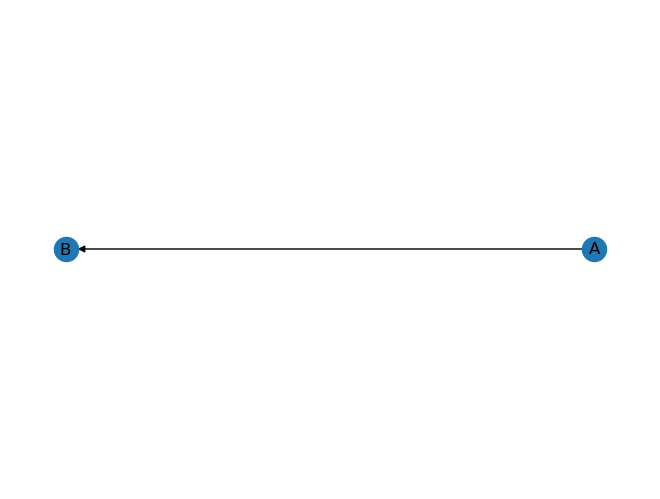

In [104]:
import networkx as nx
import matplotlib.pyplot as plt

G_test = nx.DiGraph()
G_test.add_node("A",type = 'person')
G_test.add_node("B",type = 'corp')
G_test.add_edge("A", "B")
pos_test = nx.circular_layout(G_test)
nx.draw(G_test, pos_test, with_labels=True)
plt.show()

In [120]:
adjacency_list = graph.adjacency_list
#visualize_graph(adjacency_list=adjacency_list)

In [121]:
for node, properties in adjacency_list.items():
        for edge in properties['edges']:
                print(edge['type'])

holds
holds
relative
holds
holds
holds
relative
holds
holds
holds
relative
holds
holds
holds
holds
relative
holds
holds
holds
branch
branch
branch
holds
holds
branch
holds
holds
branch
branch
holds
holds
holds
branch
branch
branch
holds
holds
holds
branch


## Conclusion

这种图结构出来的知识图谱可以运用到金融行业里，比如说进行客户分群，精准提升金融行业

## References {.unnumbered}

::: {#refs}
:::